<a href="https://colab.research.google.com/github/amien1410/kaggle-projects/blob/main/Corona_Indonesia_Data_Analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Install Kaggle Modules to download the dataset
!pip install kaggle

# Load Kaggle user authorization key
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

# Download the dataset, get the user and dataset name from the url "https://www.kaggle.com/datasets/shivamb/netflix-shows"
!kaggle datasets download -d hendratno/covid19-indonesia

# Unzip the dataset
!unzip -q "/content/covid19-indonesia"

Dataset URL: https://www.kaggle.com/datasets/hendratno/covid19-indonesia
License(s): CC-BY-NC-SA-4.0
  0% 0.00/1.22M [00:00<?, ?B/s]
100% 1.22M/1.22M [00:00<00:00, 130MB/s]


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

<ipython-input-3-42905f1ff05f>:2: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
<ipython-input-3-42905f1ff05f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_cases', y='location', data=top20_cases, palette='viridis')


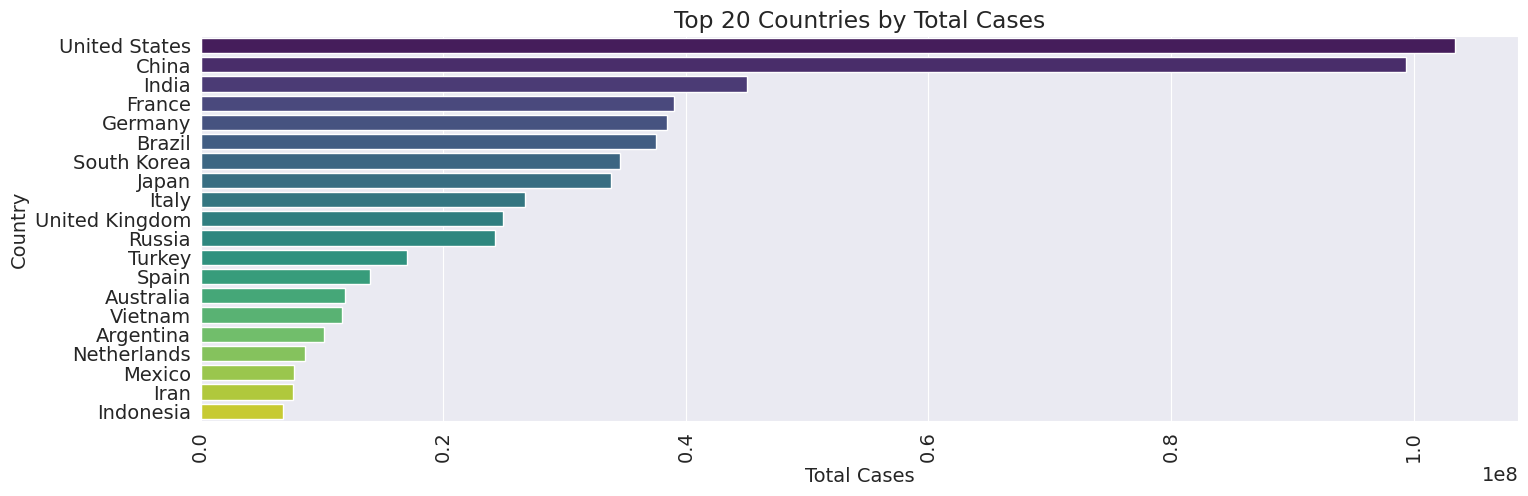

In [3]:
# Load the COVID-19 dataset
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Select relevant columns
rnr = df[['continent', 'location', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']]

# Group by location and select maximum values for each metric
dfe = rnr.groupby('location')[['continent', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].max()

# Reset index for easier manipulation
sd = dfe.reset_index()

# Remove rows with unwanted indices
sm = sd.drop(index=[1, 12, 70, 71, 96, 127, 128, 162, 169, 211, 241, 251])

# Reset index and sort values for further analysis
sn = sm.reset_index().sort_values(['continent', 'location']).reset_index()

# Extract and plot Top 20 Countries by Total Cases
top20_ca = sn.sort_values('total_cases', ascending=False).head(20)
top20_cases = top20_ca[['location', 'total_cases']].reset_index().drop('index', axis=1)

sns.barplot(x='total_cases', y='location', data=top20_cases, palette='viridis')
plt.title('Top 20 Countries by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.show()